<h1 style="text-align: center;">Exploratory Data Analysis (EDA) - Readers' Habits</h1>
<h2 style="text-align: center;">Renan Del Buono Brotto</h2>

Neste notebook, faremos uma Análise Exploratória de Dados no *dataset* "Reading Habit Dataset", que pode ser encontrado [aqui](https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset). Este dataset contém a quantidade de livros que um grupo de pessoas leu em 12 meses, assim como algumas características dessas pessoas, tais como idade, gênero, nível de escolaridade, renda, entre outros.

Para uma melhor organização, a análise dos dados foi feita em três etapas:

1) [Data Cleaning](#data_cleaning), onde as colunas do dataset original foram renomeadas, e também tratamos os valores faltantes de cada atributo;

2) [Análises Simples](#analises_simples), cujo objetivo é entender melhor o dataset, olhando para os atributos individualmente;

3) [Análises Compostas](#analises_compostas), onde realizamos inferências estatísticas relacionando dois ou mais atributos.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 
<a id='data_cleaning'></a>

Tratamento Inicial: renomeando as colunas

In [4]:
path = r'D:\Renan\Datasets\readers_habbits_data'
dataset_name = r'\readers_habbits.csv'
df = pd.read_csv(path+dataset_name)

#Renaming columns
print(df.columns)
df = df.rename(columns={'Marital status?':'Marital status',
                        'How many books did you read during last 12months?':'Books Read',
                        'Read any printed books during last 12months?':'Printed Books',
                        'Read any audiobooks during last 12months?':'Audiobooks',
                        'Read any e-books during last 12months?':'Ebooks',
                        'Last book you read, you…':'Book Origin',
                        'Do you happen to read any daily news or newspapers?':'Newspapers',
                        'Do you happen to read any magazines or journals?':'Journals'})
print(df.columns)

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')
Index(['Age', 'Sex', 'Race', 'Marital status', 'Education', 'Employement',
       'Incomes', 'Books Read', 'Printed Books', 'Audiobooks', 'Ebooks',
       'Book Origin', 'Newspapers', 'Journals'],
      dtype='object')


Conhecendo os atributos do dataset

a) Quais atributos temos?

b) Qual é o tipo de cada atributo?

In [5]:
df.dtypes

Age                int64
Sex               object
Race              object
Marital status    object
Education         object
Employement       object
Incomes           object
Books Read         int64
Printed Books     object
Audiobooks        object
Ebooks            object
Book Origin       object
Newspapers        object
Journals          object
dtype: object

Temos, ao todo, 14 atributos sobre cada um dos leitores do dataset; são eles: Idade (Age), Gênero (Sex), Etnia (Race), Situação Conjugal (Marital Status), Nível de Educação (Education), Tipo de Emprego (Employment), Rendimento (Incomes), Número de livros lidos no último ano (Books Read), Uso de livros impressos (Printed Books), Uso de audiolivros (Audiobooks), Uso de livros eletrônicos (Ebooks), Procedência dos Livros (Book Origin), Hábito de ler jornais (Nespapers) Hábito de ler revistas (Journals).

Com exceção da Idade (Age) e da Quantidade de livros lidos nos útimos 12 meses (Books read), que são atributos que assumem valores inteiros, os demais atributos são do tipo string (uma cadeia de caracteres), armazenados no tipo "object". Para mais informações, consultar [Pandas' Guide](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes).

Vamos, agora, verificar os valores que cada um dos atributos assume para, logo em seguida, melhor conhecermos o dataset.

In [6]:
print('Before Data Cleaning')
for attribute in df.columns:
    print(f'Attribute: {attribute}')
    print(f'Values: {df[attribute].unique()}')
    print('------------------------------------------------')

Before Data Cleaning
Attribute: Age
Values: [66 46 32 27 16 55 63 60 50 29 23 19 89 88 84 81 80 79 78 77 76 75 73 71
 70 69 68 67 65 64 62 59 58 57 56 54 53 52 45 44 42 41 40 38 37 36 35 34
 33 30 28 26 25 24 22 21 20 18 17 48 47 74 61 39 31 51 90 83 72 49 86 82
 43 85 91 87 93 92]
------------------------------------------------
Attribute: Sex
Values: ['Male' 'Female']
------------------------------------------------
Attribute: Race
Values: ['Refused' 'Native American/American Indian' 'Mixed race'
 'Asian or Pacific Islander' 'Black or African-American' 'White'
 'Don’t know' 'Other']
------------------------------------------------
Attribute: Marital status
Values: ['Divorced' 'Married' 'Never been married' 'Widowed' 'Don’t know'
 'Living with a partner' 'Single' 'Separated']
------------------------------------------------
Attribute: Education
Values: ['College graduate' 'High school graduate' 'High school incomplete'
 'Some college, no 4-year degree'
 'Post-graduate training/profess

Como para alguns atributos temos os valores 'nan' (not a number) e outros valores inadequados (como os números 8 e 9 para a origem dos livros), precisamos tratar essas lacunas antes de avançarmos na exploração dos dados. Primeiramente, vamos verificar qual é o percentual de informação faltante, para melhor lidar com essas lacunas.

In [7]:
missing_printed_books = 100*df[df['Printed Books'].isnull()].shape[0]/df.shape[0]
missing_audiobooks = 100*df[df['Audiobooks'].isnull()].shape[0]/df.shape[0]
missing_ebooks = 100*df[df['Ebooks'].isnull()].shape[0]/df.shape[0]
missing_book_origin = 100*df[df['Book Origin'].isnull()].shape[0]/df.shape[0]
missing_book_origin_8 = 100*df[df['Book Origin']=='8'].shape[0]/df.shape[0]
missing_book_origin_9 = 100*df[df['Book Origin']=='9'].shape[0]/df.shape[0]

print(f'Percentual of Missing Values for Printed Books: {np.round(missing_printed_books,2)}')
print(f'Percentual of Missing Values for Audiobooks: {np.round(missing_audiobooks,2)}')
print(f'Percentual of Missing Values for Ebooks: {np.round(missing_ebooks,2)}')
print(f'Percentual of Missing Values for Book Origin: {np.round(missing_book_origin,2)}')
print(f'Percentual of "8" Value for Book Origin: {np.round(missing_book_origin_8,2)}')
print(f'Percentual of "9" Value for Book Origin: {np.round(missing_book_origin_9,2)}')

##Indices of missing values for each attribute
idx_printed_books = df[df['Printed Books'].isnull()].index.tolist()
idx_audiobooks = df[df['Audiobooks'].isnull()].index.tolist()
idx_ebooks = df[df['Ebooks'].isnull()].index.tolist()
idx_book_origin = df[df['Book Origin'].isnull()].index.tolist()

##How many missing values for each attribute
print()
print('Number of Missing Values for Each Attribute')
print(f'Printed Books: {len(idx_printed_books)}')
print(f'Audiobooks: {len(idx_audiobooks)}')
print(f'Ebooks: {len(idx_ebooks)}')
print(f'Book Origin: {len(idx_book_origin)}')
     
##Intersection of the missing values    
intersection = set(idx_printed_books).intersection(idx_audiobooks, idx_ebooks, idx_book_origin)
print(f'Intersection Length: {len(intersection)}')

Percentual of Missing Values for Printed Books: 13.77
Percentual of Missing Values for Audiobooks: 13.77
Percentual of Missing Values for Ebooks: 13.77
Percentual of Missing Values for Book Origin: 13.77
Percentual of "8" Value for Book Origin: 0.88
Percentual of "9" Value for Book Origin: 0.21

Number of Missing Values for Each Attribute
Printed Books: 390
Audiobooks: 390
Ebooks: 390
Book Origin: 390
Intersection Length: 390


Como podemos observar da análise anterior, temos um total de 13.77% de dados faltantes para cada um dos atributos, e menos de 1% dos valores iguais a 9 e a 8 para a origem dos livros. 

Quando buscamos os índices dos indivíduos com atributos faltantes, notamos algo interessante: temos a mesma quantidade de informação faltante para cada um deles. Quando realizamos a intersecção entre todas essas listas de índices, notamos que a intersecção também tem o mesmo número de índices com informação faltante. Assim, concluímos que os índices com informações faltantes são comuns a todos os atributos, ou seja, os indivíduos que não responderam se leram com livros impressos são os mesmos que não responderam se usam audiolivros. 

Para os atributos "Printed Books", "Audiobooks" e "Ebooks", vamos substituir os valores 'nan' por "Don't know"; já para "Book Origin", vamos trocar os valores '8', '9' e 'nan' por 'Got the book some other way'. Como escolhemos as opções de maior incerteza, não introduzimos um grande viés no dataset, o que poderia afetar outras análises. Uma outra opção seria substituir os valores faltantes pela resposta majoritária de cada atributo.

Para finalizar a etapa de limpeza dos dados, notamos que o atributo "Incomes" apresenta um valor com um erro de *typo*: '9\\$100,000 to under \\$150,000'. O correto é '\\$100,000 to under \\$150,000' (sem o número 9 antes do sinal $)

In [8]:
df['Printed Books'].fillna('Don’t know', inplace=True)
df['Audiobooks'].fillna('Don’t know', inplace=True)
df['Ebooks'].fillna('Don’t know', inplace=True)

df['Book Origin'].fillna('Got the book some other way', inplace=True)
df['Book Origin'].replace('8', 'Got the book some other way', inplace=True)
df['Book Origin'].replace('9', 'Got the book some other way', inplace=True)

df['Incomes'].replace('9$100,000 to under $150,000', '$100,000 to under $150,000', inplace=True)

print('After Data Cleaning')
for attribute in df.columns:
    print(f'Attribute: {attribute}')
    print(f'Values: {df[attribute].unique()}')
    print('------------------------------------------------')

After Data Cleaning
Attribute: Age
Values: [66 46 32 27 16 55 63 60 50 29 23 19 89 88 84 81 80 79 78 77 76 75 73 71
 70 69 68 67 65 64 62 59 58 57 56 54 53 52 45 44 42 41 40 38 37 36 35 34
 33 30 28 26 25 24 22 21 20 18 17 48 47 74 61 39 31 51 90 83 72 49 86 82
 43 85 91 87 93 92]
------------------------------------------------
Attribute: Sex
Values: ['Male' 'Female']
------------------------------------------------
Attribute: Race
Values: ['Refused' 'Native American/American Indian' 'Mixed race'
 'Asian or Pacific Islander' 'Black or African-American' 'White'
 'Don’t know' 'Other']
------------------------------------------------
Attribute: Marital status
Values: ['Divorced' 'Married' 'Never been married' 'Widowed' 'Don’t know'
 'Living with a partner' 'Single' 'Separated']
------------------------------------------------
Attribute: Education
Values: ['College graduate' 'High school graduate' 'High school incomplete'
 'Some college, no 4-year degree'
 'Post-graduate training/professi

Agora que realizamos o Data Cleaning, vamos conhecer um pouco melhor cada um dos atributos. 

## Análises Simples
<a id='analises_simples'></a>

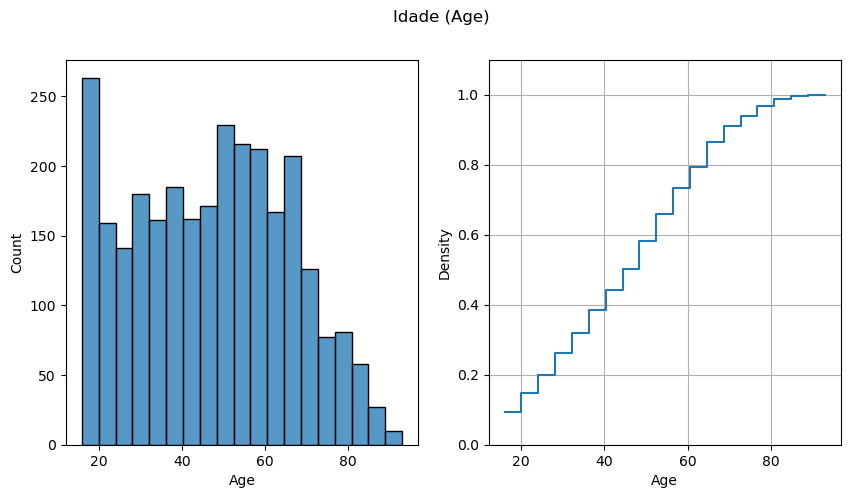

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Idade (Age)')
sns.histplot(ax=axs[0], data=df, x=df['Age'])
sns.histplot(ax=axs[1], data=df, x=df['Age'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[1].set_ylim(0,1.1)
axs[1].grid('both')

Olhando para o histograma associado aos valores do atributo Idade (Age), notamos que uma boa parte dos valores está contida no intervalo de 20 a 60 anos. Olhando o gráfico a direita, que corresponde a um gráfico de probabilidade (ou, mais precisamente, frequência) acumulada, notamos que mais de 70% dos valores para Idade estão contidos em tal intervalo.

Para analisar com mais detalhes essa variável, vamos calcular os percentis associados a ela:

In [10]:
percentils_age = np.percentile(df['Age'], q=np.arange(10, 100, 10))
for i, perc in enumerate(percentils_age):
    print(f'{10*(i+1)}%, {perc} years')
    
min_age = df['Age'].min()
mean_age = df['Age'].mean()
max_age = df['Age'].max()
print()
print(f'Minimum Age: {min_age}')
print(f'Mean Age: {mean_age}')
print(f'Maximum Age: {max_age}')

10%, 21.0 years
20%, 29.0 years
30%, 35.0 years
40%, 42.0 years
50%, 48.0 years
60%, 53.0 years
70%, 59.0 years
80%, 65.0 years
90%, 71.0 years

Minimum Age: 16
Mean Age: 47.27648305084746
Maximum Age: 93


Com essa nova análise, vemos que, de fato, a faixa etária entre 16 e 59 anos concentra 70% dos valores. Também notamos que apenas 10% dos valores estão abaixo dos 21 ou acima dos 71 anos.

(0.0, 1.1)

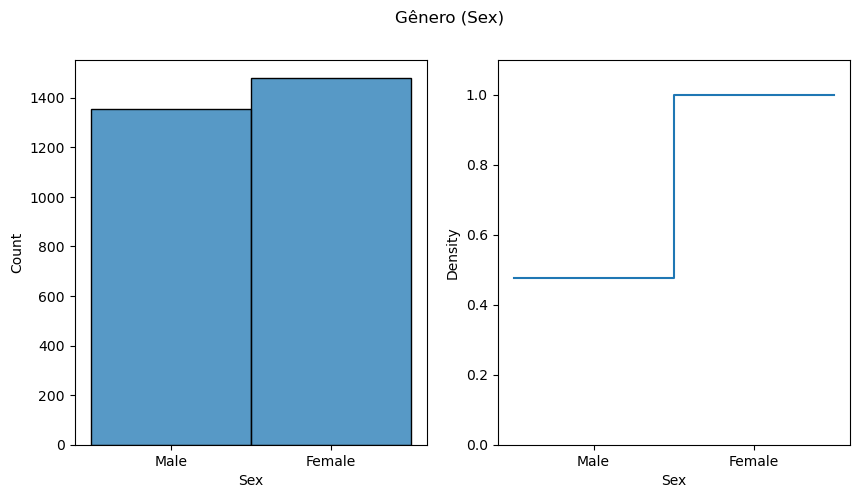

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Gênero (Sex)')
sns.histplot(ax=axs[0], data=df, x=df['Sex'])
sns.histplot(ax=axs[1], data=df, x=df['Sex'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[1].set_ylim(0,1.1)

Para o atributo Gênero (Sex), notamos uma distribuição praticamente uniforme, com uma frequência ligeiramente superior para o gênero feminino (female). De fato, um cálculo mais preciso nos motra que 47,78% da população é composta por homens, enquanto que as mulheres correspondem a 52.22% de toda a popoulação.

In [12]:
perc_female = 100*df[df['Sex']=='Female'].shape[0]/df.shape[0]
print(f' Male (%) = {np.round(100-perc_female,2)}, Female (%) = {np.round(perc_female,2)}')

 Male (%) = 47.78, Female (%) = 52.22


(0.0, 1.1)

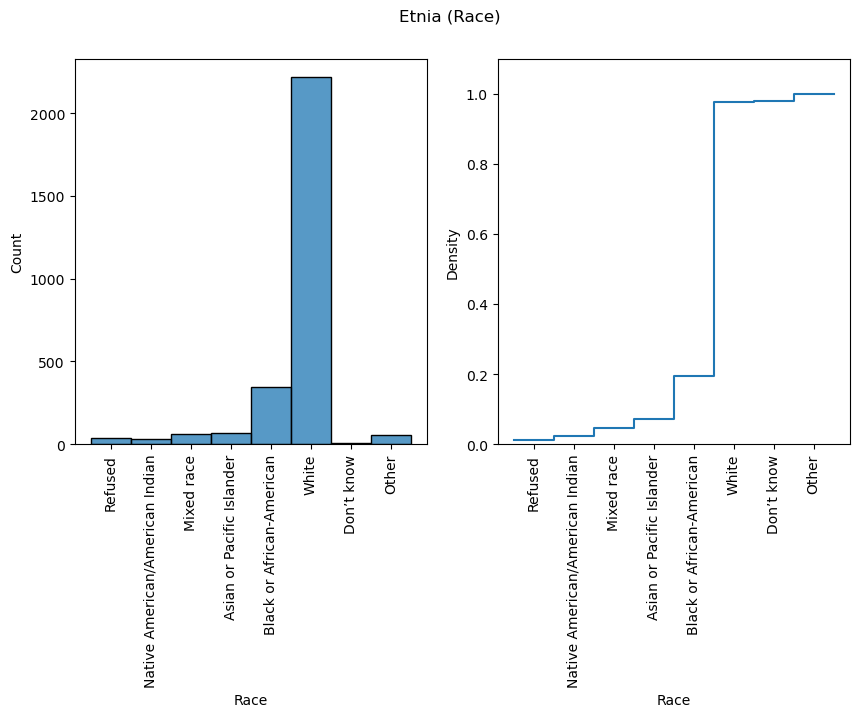

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Etnia (Race)')
sns.histplot(ax=axs[0], data=df, x=df['Race'])
sns.histplot(ax=axs[1], data=df, x=df['Race'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

Por outro lado, notamos que a etnia branca compõe praticamente 80% da população que forma o dataset que estamos estudando. 

In [14]:
perc_white = 100*df[df['Race']=='White'].shape[0]/df.shape[0]
print(f'White people [%]: {np.round(perc_white,2)}')

White people [%]: 78.28


(0.0, 1.1)

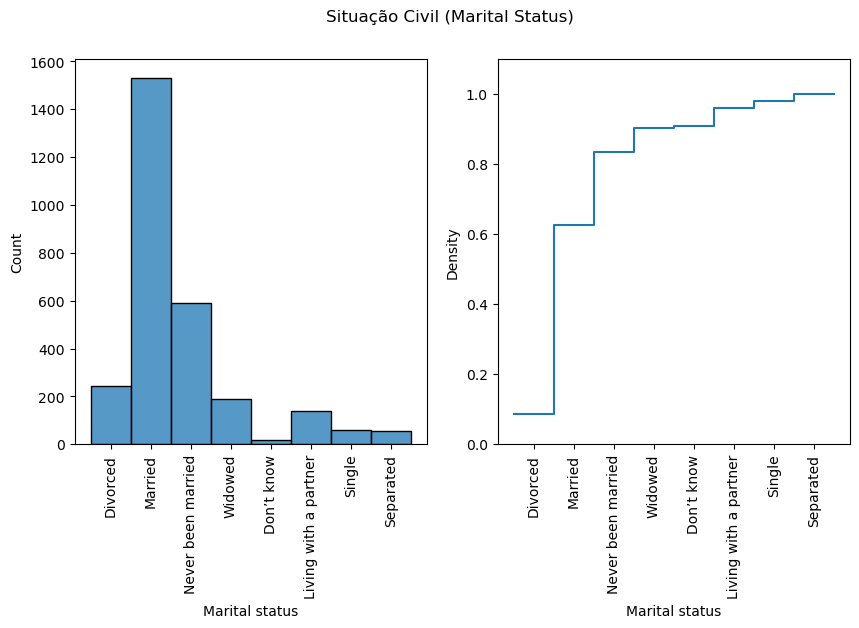

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Situação Civil (Marital Status)')
sns.histplot(ax=axs[0], data=df, x=df['Marital status'])
sns.histplot(ax=axs[1], data=df, x=df['Marital status'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

In [16]:
perc_married = 100*df[df['Marital status']=='Married'].shape[0]/df.shape[0]
perc_never_married = 100*df[df['Marital status']=='Never been married'].shape[0]/df.shape[0]
perc_divorced = 100*df[df['Marital status']=='Divorced'].shape[0]/df.shape[0]
perc_others = 100-(perc_married + perc_never_married + perc_divorced)

print(f'Married [%]: {np.round(perc_married,2)}, Never Married [%]: {np.round(perc_never_married,2)}, Divorced [%]: {np.round(perc_divorced, 2)}, Others [%]: {np.round(perc_others, 2)}')

Married [%]: 54.1, Never Married [%]: 20.9, Divorced [%]: 8.65, Others [%]: 16.35


Com relação ao Estado Civil (Marital Status), 54,1% da população é casada, 20,9% nunca se casou e 8,65% é divorciada. Todos os demais estados civis (viúvo, solteiro, separado, morando com alguém e 'não sei') completam os 16,35% restantes.

(0.0, 1.1)

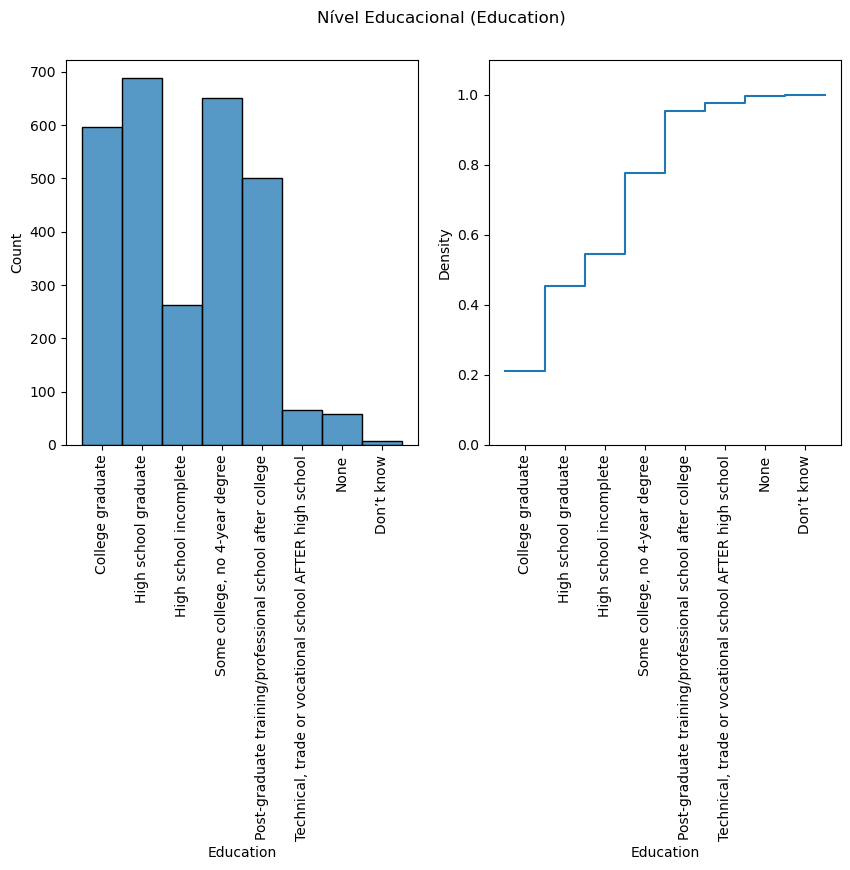

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Nível Educacional (Education)')
sns.histplot(ax=axs[0], data=df, x=df['Education'])
sns.histplot(ax=axs[1], data=df, x=df['Education'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

Com relação ao nével educacional, notamos que os níveis 'College graduate', 'Highschool graduate', 'Some college, no 4-year degree' e 'Post graduate training/professional school after college' formam a maior parte do dataset, contabilizando 86,05% das amostras.

In [18]:
perc_college_grad = 100*df[df['Education']=='College graduate'].shape[0]/df.shape[0]
perc_hschool_grad = 100*df[df['Education']=='High school graduate'].shape[0]/df.shape[0]
perc_some_college = 100*df[df['Education']=='Some college, no 4-year degree'].shape[0]/df.shape[0]
perc_post_grad_training = 100*df[df['Education']=='Post-graduate training/professional school after college'].shape[0]/df.shape[0]
total = perc_college_grad + perc_hschool_grad + perc_some_college + perc_post_grad_training

print(f'College graduate: {np.round(perc_college_grad, 2)}%')
print(f'High school graduate: {np.round(perc_hschool_grad, 2)}%')
print(f'Some college, no 4-year degree: {np.round(perc_some_college, 2)}%')
print(f'Post-graduate training/professional school after college: {np.round(perc_post_grad_training, 2)}%')
print(f'Sum = {np.round(total,2)}%')

College graduate: 21.08%
High school graduate: 24.29%
Some college, no 4-year degree: 22.99%
Post-graduate training/professional school after college: 17.69%
Sum = 86.05%


Perc. Employed Full-Time: 43.71


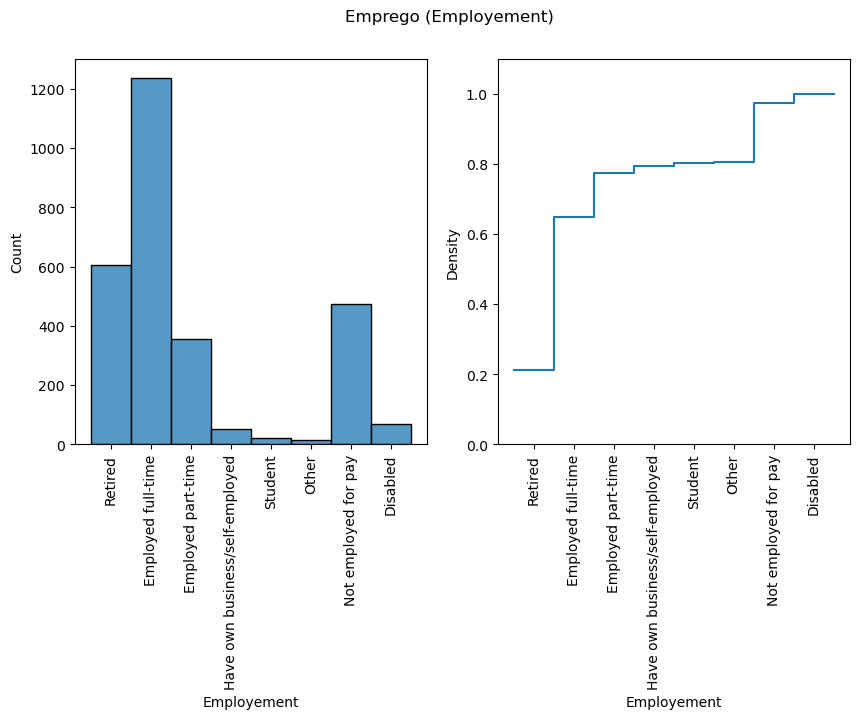

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Emprego (Employement)')
sns.histplot(ax=axs[0], data=df, x=df['Employement'])
sns.histplot(ax=axs[1], data=df, x=df['Employement'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_employed = 100*df[df['Employement']=='Employed full-time'].shape[0]/df.shape[0]
perc_retired = 100*df[df['Employement']=='Retired'].shape[0]/df.shape[0]
perc_not_employed_for_pay = 100*df[df['Employement']=='Not employed for pay'].shape[0]/df.shape[0]
perc_employed_part_time = 100*df[df['Employement']=='Employed part-time'].shape[0]/df.shape[0]

print(f'Perc. Employed Full-Time: {np.round(perc_employed,2)}')

Já o tipo de emprego, 43.71% das pessoas têm um emprego em tempo integral, sendo essa a resposta mais frequente em todo o dataset.

(0.0, 1.1)

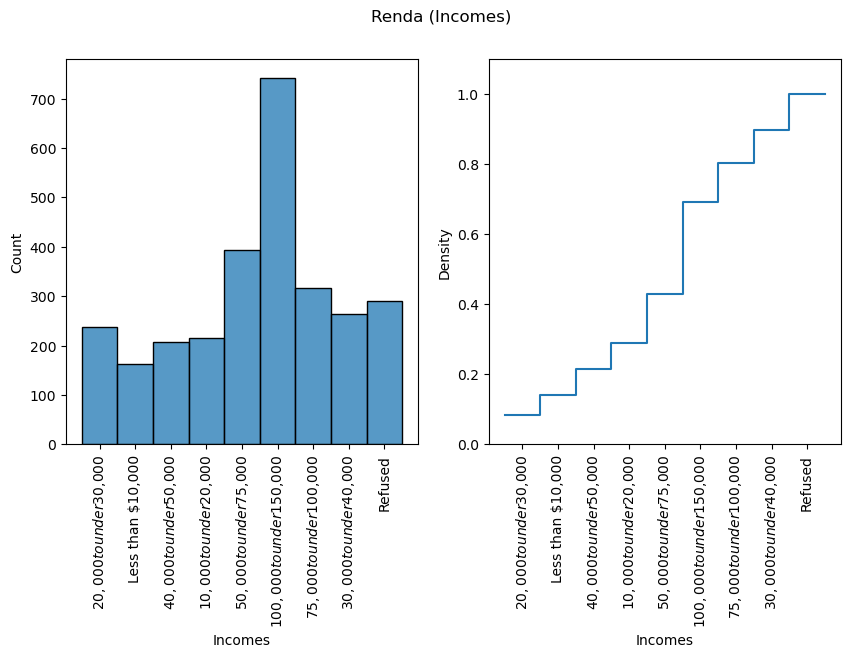

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Renda (Incomes)')
sns.histplot(ax=axs[0], data=df, x=df['Incomes'])
sns.histplot(ax=axs[1], data=df, x=df['Incomes'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

(0.0, 1.1)

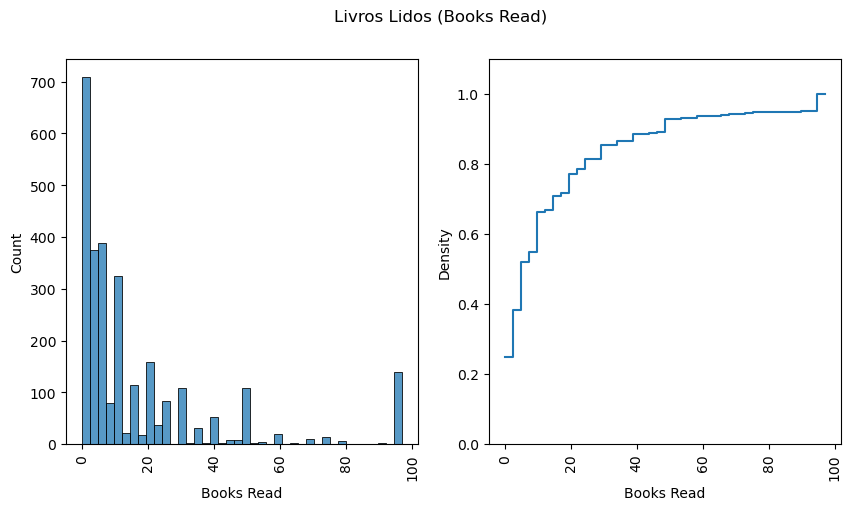

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Livros Lidos (Books Read)')
sns.histplot(ax=axs[0], data=df, x=df['Books Read'])
sns.histplot(ax=axs[1], data=df, x=df['Books Read'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

In [22]:
percentils_books_read = np.percentile(df['Books Read'], q=np.arange(10, 100, 10))
for i, perc in enumerate(percentils_books_read):
    print(f'{10*(i+1)}%, {perc} books')
    
min_age = df['Books Read'].min()
mean_age = df['Books Read'].mean()
max_age = df['Books Read'].max()
print()
print(f'Minimum Number of Books Read: {min_age}')
print(f'Average Number of Books Read: {mean_age}')
print(f'Maximum Number of Books Read: {max_age}')

10%, 0.0 books
20%, 2.0 books
30%, 3.0 books
40%, 5.0 books
50%, 6.0 books
60%, 10.0 books
70%, 15.0 books
80%, 25.0 books
90%, 50.0 books

Minimum Number of Books Read: 0
Average Number of Books Read: 16.67620056497175
Maximum Number of Books Read: 97


Com relação a quantidade de livros lidos em um ano, metade das indivíduos leu até 6 livros, enquanto que 70% da população leu até 15 livros, valor esse inferior ao da média de todo o conjunto, que foi de 16,67.

(0.0, 1.1)

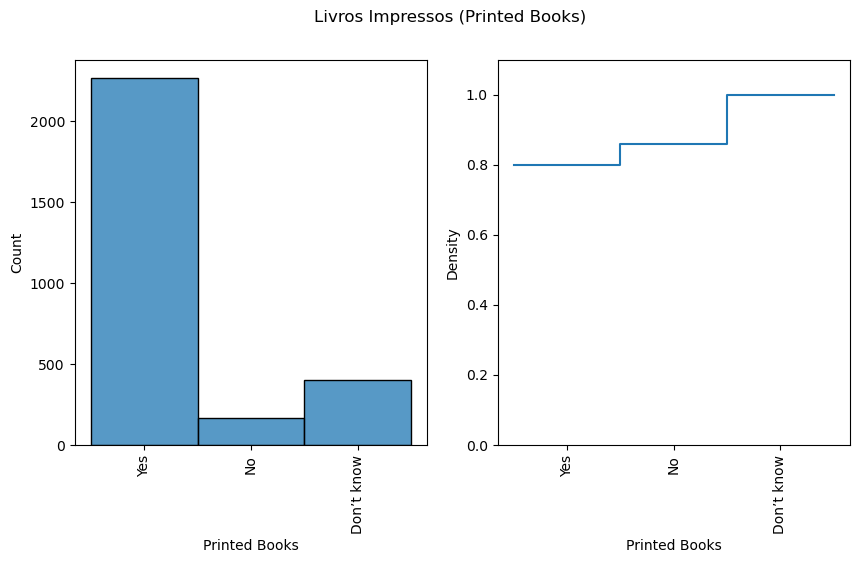

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Livros Impressos (Printed Books)')
sns.histplot(ax=axs[0], data=df, x=df['Printed Books'])
sns.histplot(ax=axs[1], data=df, x=df['Printed Books'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

Com relação ao formato de livro impresso, 80% dos leitores utilizam esse tipo de formato. Já para os Audiolivros, apenas 14.51% fazem uso desse formato. Por fim, os livros em formato eletrônico, são usados por 27,79% da população.

Percetual of Audiobook Users: 14.51


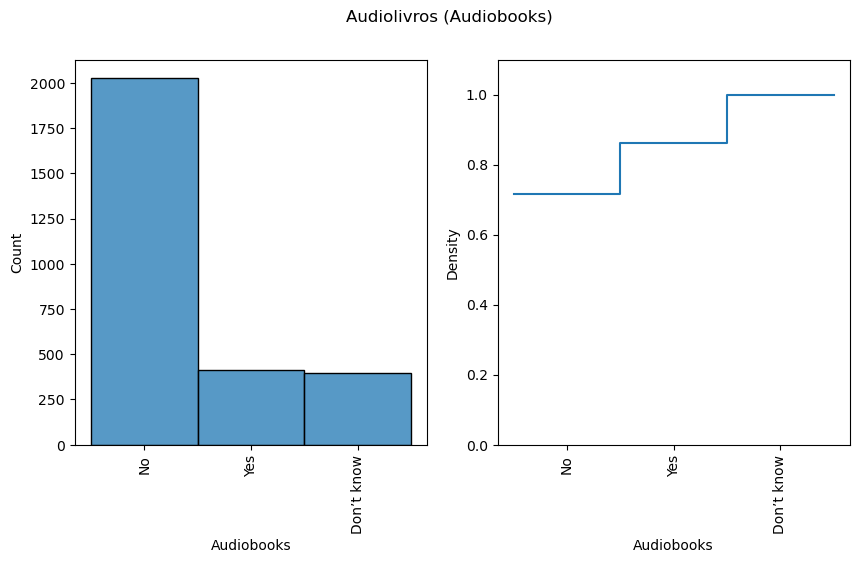

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Audiolivros (Audiobooks)')
sns.histplot(ax=axs[0], data=df, x=df['Audiobooks'])
sns.histplot(ax=axs[1], data=df, x=df['Audiobooks'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_audiobooks = 100*df[df['Audiobooks']=='Yes'].shape[0]/df.shape[0]
print(f'Percetual of Audiobook Users: {np.round(perc_audiobooks, 2)}')

Percetual of Ebook Users: 27.79


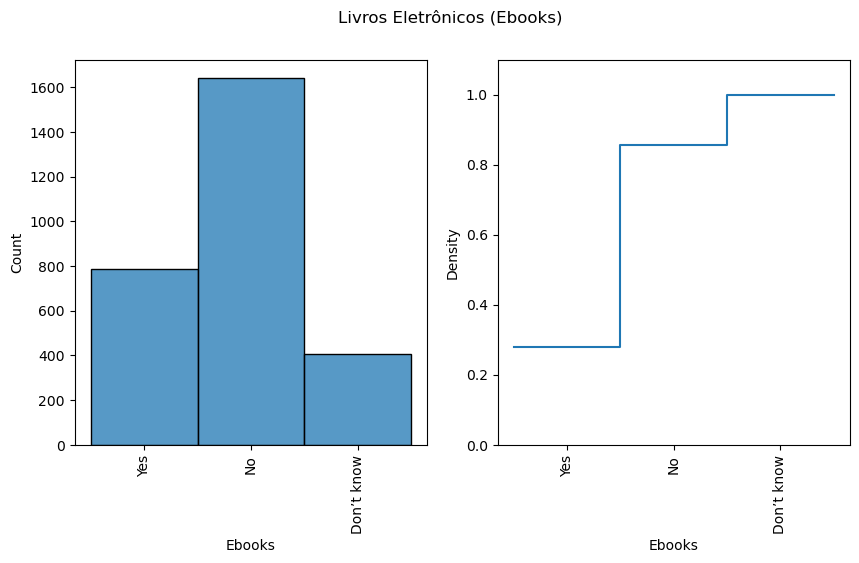

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Livros Eletrônicos (Ebooks)')
sns.histplot(ax=axs[0], data=df, x=df['Ebooks'])
sns.histplot(ax=axs[1], data=df, x=df['Ebooks'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_ebooks = 100*df[df['Ebooks']=='Yes'].shape[0]/df.shape[0]
print(f'Percetual of Ebook Users: {np.round(perc_ebooks, 2)}')

Com relação ao outras leituras, 61, 79% dos leitores lêem jornais e 53,18% lêem revistas de temas específicos e boletins.

Percentual of Newspapers Readers: 61.79


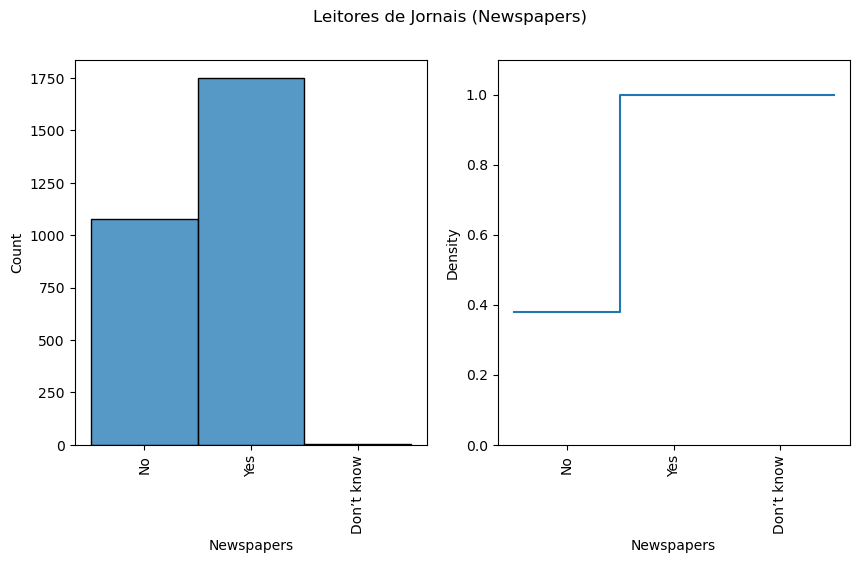

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Leitores de Jornais (Newspapers)')
sns.histplot(ax=axs[0], data=df, x=df['Newspapers'])
sns.histplot(ax=axs[1], data=df, x=df['Newspapers'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_newspapers = 100*df[df['Newspapers']=='Yes'].shape[0]/df.shape[0]
print(f'Percentual of Newspapers Readers: {np.round(perc_newspapers, 2)}')

Percentual of Journals/Magazines Readers: 53.18


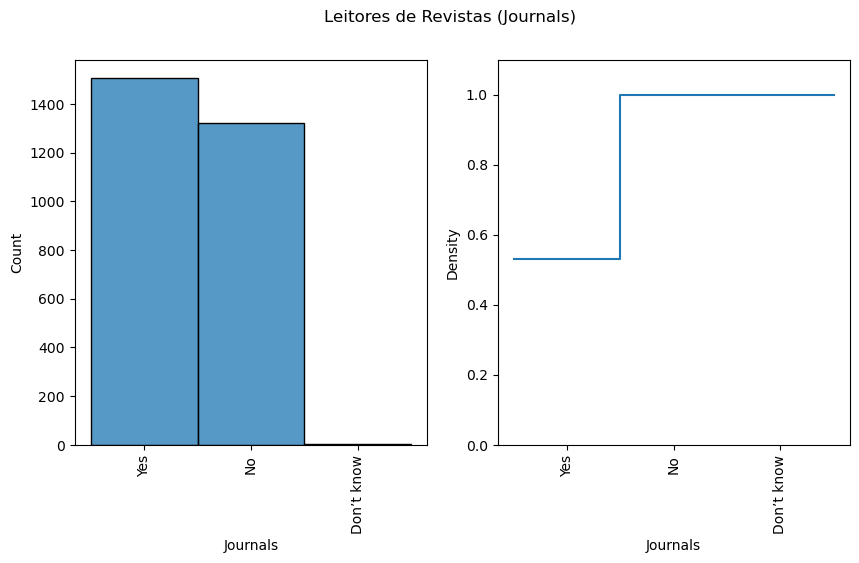

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Leitores de Revistas (Journals)')
sns.histplot(ax=axs[0], data=df, x=df['Journals'])
sns.histplot(ax=axs[1], data=df, x=df['Journals'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_journals = 100*df[df['Journals']=='Yes'].shape[0]/df.shape[0]
print(f'Percentual of Journals/Magazines Readers: {np.round(perc_journals, 2)}')

Perc. Purchased: 44.7
Perc. from Friends/Family: 17.69
Perc. from Library: 11.83
Perc. Other: 25.78


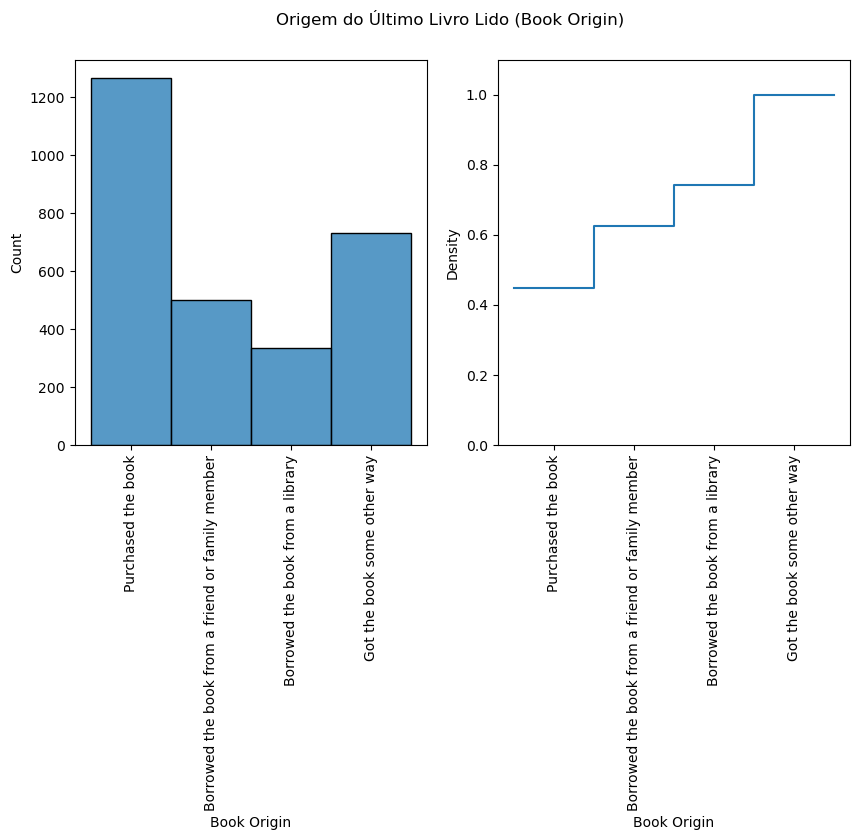

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Origem do Último Livro Lido (Book Origin)')
sns.histplot(ax=axs[0], data=df, x=df['Book Origin'])
sns.histplot(ax=axs[1], data=df, x=df['Book Origin'], element="step", fill=False, cumulative=True, stat="density", common_norm=False)
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,1.1)

perc_purchased = 100*df[df['Book Origin']=='Purchased the book'].shape[0]/df.shape[0]
perc_friend = 100*df[df['Book Origin']=='Borrowed the book from a friend or family member'].shape[0]/df.shape[0]
perc_library = 100*df[df['Book Origin']=='Borrowed the book from a library'].shape[0]/df.shape[0]
perc_other =  100*df[df['Book Origin']=='Got the book some other way'].shape[0]/df.shape[0]
 
print(f'Perc. Purchased: {np.round(perc_purchased,2)}')  
print(f'Perc. from Friends/Family: {np.round(perc_friend,2)}')  
print(f'Perc. from Library: {np.round(perc_library,2)}')  
print(f'Perc. Other: {np.round(perc_other,2)}')  

Com relação à origem dos livros, 44.7% da população comprou-os, enquanto que 17,69% os emprestaram de familiares e amigos e 11,83% os emprestaram da biblioteca. Os demais 25,78% obtiveram os livros de outra forma.

Agora que conhecemos os atributos do dataset com mais detalhes, vamos fazer algumas análises mais avançadas, buscando relacionar os diferentes atributos.

## Análises Compostas
<a id='analises_compostas'></a>

### Pessoas que lêem jornais costumam ler mais livros?

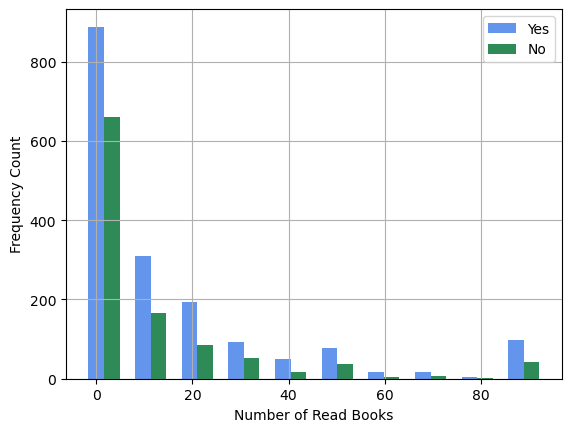

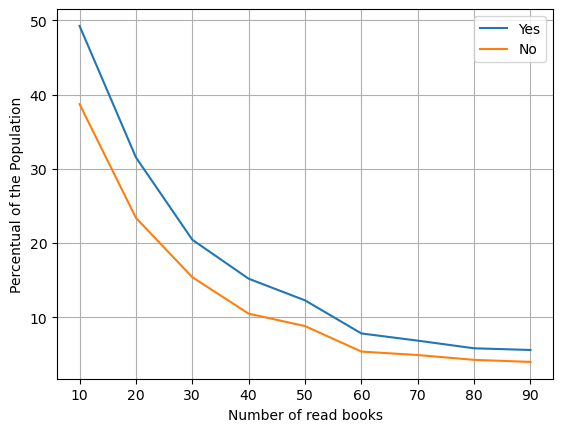

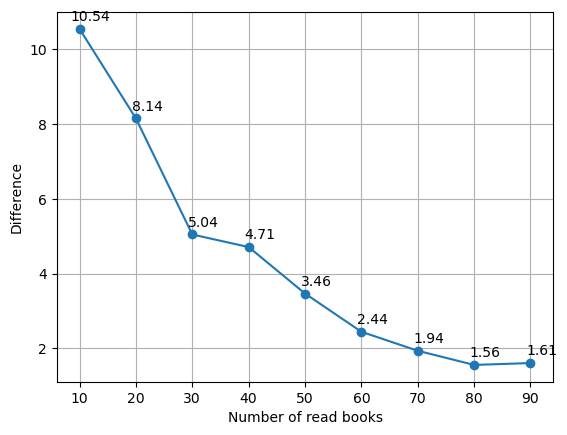

In [29]:
### Some Queries
## Group 1: People who reads Newspapers; Group 2: people who does not read; Group 3: people who does not know
df1 = df[df['Newspapers']=='Yes']
total_1 = df1.shape[0]

df2 = df[df['Newspapers']=='No']
total_2 = df2.shape[0]

df3 = df[df['Newspapers']=='Don’t know']
total_3 = df3.shape[0]

a_heights, a_bins = np.histogram(df1['Books Read'])
b_heights, b_bins = np.histogram(df2['Books Read'])
width = (a_bins[1] - a_bins[0])/3

## Histogram to get some insights
fig, ax = plt.subplots()
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
ax.legend(['Yes','No'])
ax.grid()
ax.set_xlabel('Number of Read Books')
ax.set_ylabel('Frequency Count')

## How many people, of each group, read more than N books?
N_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]
gp1_list = []
gp2_list = []

for n in N_list:
    perc1 = 100*(df1[df1['Books Read'] >= n].shape[0]/total_1)
    perc2 = 100*(df2[df2['Books Read'] >= n].shape[0]/total_2)
    gp1_list.append(perc1)
    gp2_list.append(perc2)
    
plt.figure()
plt.plot(N_list, gp1_list)
plt.plot(N_list, gp2_list)
plt.xticks(N_list)
plt.grid()
plt.legend(['Yes','No'])
plt.xlabel('Number of read books')
plt.ylabel('Percentual of the Population')

##Plotting the difference
diff = np.asarray(gp1_list) - np.asarray(gp2_list)
plt.figure()
plt.plot(N_list, diff, marker='o')
plt.grid()
plt.xlabel('Number of read books')
plt.ylabel('Difference')
for x,y in zip(N_list, diff):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(8,6), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

Comparando os dois grupos, pessoas que lêem jornais ('Yes') com as que não lêem jornais ('No'), observamos, no primeiro gráfico, que o hábito de leitura é sempre mais frequente no primeiro grupo do que no segundo, para todas as quantidades de livros consideradas.

No segundo gráfico, comparamos qual o percentual de cada um dos grupos leu até uma quantidade "N" de livros. Por exemplo, do grupo de pessoas que lêem jornais, em torno de 50% delas leram até 10 livros em um ano. Já para o segundo grupo, esse valor fica em torno de 40%. 

Quando analisamos a diferença entre os percentuais de cada grupo (terceiro gráfico), notamos que o hábito de ler jornais parece distinguir melhor os dois grupos quando analisamos um número menor de livros lidos. Para ilustrar melhor esse fato, vamos considerar os casos onde foram lidos até 10 livros em um ano. A diferença, em percentual, entre os dois grupos é de 10.54%. Quando comparamos os dois grupos considerando 30 livros lidos em um ano, notamos que essa diferença cai para 5.04%. Finalmente, para grandes quantidades de livros lidos (acima de 70 livros no ano), a diferença percentual entre os dois grupos cai para menos de 2%.

A partir dessas análises, notamos que o hábito de ler jornais exerce menos influência no hábito de leitura à medida aumentamos a quantidade de livros lidos.

### As Mulheres lêem mais do que os Homens?

Text(0, 0.5, 'Frequency Count')

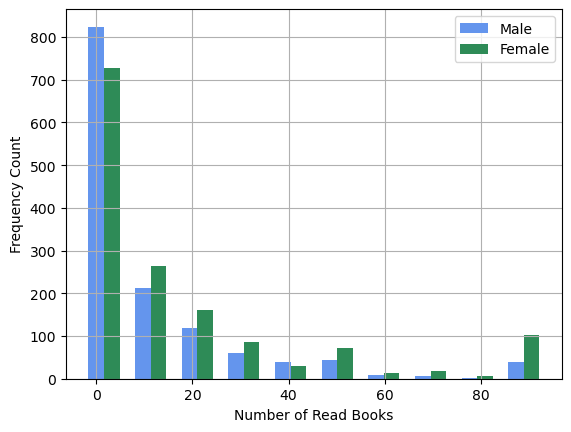

In [30]:
df_male = df[df['Sex']=='Male']
total_male = df_male.shape[0]

df_female = df[df['Sex']=='Female']
total_female = df_female.shape[0]

a_heights, a_bins = np.histogram(df_male['Books Read'])
b_heights, b_bins = np.histogram(df_female['Books Read'])
width = (a_bins[1] - a_bins[0])/3

## Histogram to get some insights
fig, ax = plt.subplots()
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
ax.legend(['Male','Female'])
ax.grid()
ax.set_xlabel('Number of Read Books')
ax.set_ylabel('Frequency Count')

Observando o primeiro gráfico notamos que, em geral, as mulheres lêem mais do que os homens, com exceção apenas para o grupo que leu entre 0 e 10 livros em um ano.

Para analisar com mais detalhes a influência do gênero no hábito de leitura, vamos comparar a probabilidade de ler até "N" livros em um ano, sabendo-se o gênero da pessoa. O que vamos fazer agora é um estudo da probabilidade a posteriori e, para isso, vamos usar a Regra de Bayes:

$$P[N|M] = \frac{P[N,M]}{P[M]}$$

$P[N|M]$: probabilidade de ler até N livros, DADO que é homem (male, M);

$P[N,M]$: probabilidade de ler até N livros E ser homem;

$P[M]$: probabilidade de ser homem

Do mesmo modo, podemos definir a probabilidade a posteriori de ler até "N" livros, dado que é mulher, da seguinte forma

$$P[N|F] = \frac{P[N,F]}{P[F]}$$

$P[F]$: probabilidade de ser mulher (female, F).

Para fins de comparação, vamos analisar também a probabilidade a priori $P[N]$, ou seja, a probabilidade de alguém ler até "N" livros em um ano, sem levar em consideração o gênero.

Text(0.5, 1.0, 'Probability of Reading a Certain Ammount of Books')

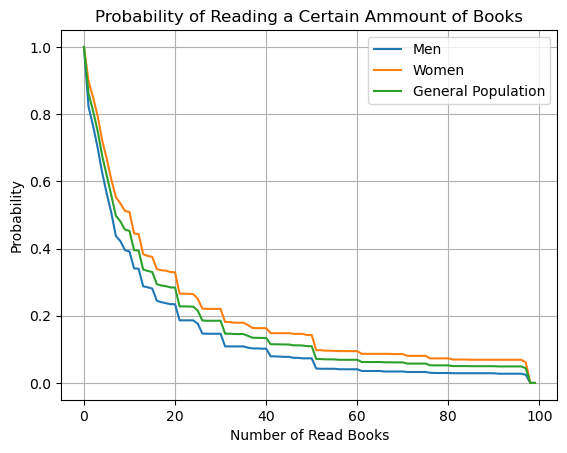

In [31]:
## Calculating some Probabilities
### a) Prob. of a man/women reading more than N books - General Population
N_max = 100
men_list = []
women_list = []
prior_list = []

for N in range(N_max):    
    p_N_and_man = df.query('`Books Read` >= @N and `Sex` == "Male"').shape[0]/df.shape[0]
    p_man = df.query('Sex == "Male"').shape[0]/df.shape[0]
    men_list.append(p_N_and_man/p_man)

    p_N_and_woman = df.query('`Books Read` >= @N and `Sex` == "Female"').shape[0]/df.shape[0]
    p_woman = df.query('Sex == "Female"').shape[0]/df.shape[0]
    women_list.append(p_N_and_woman/p_woman)
    
    p_N_prior = df.query('`Books Read` >= @N').shape[0]/df.shape[0]
    prior_list.append(p_N_prior)

plt.figure()
plt.plot(range(N_max), men_list)
plt.plot(range(N_max), women_list)
plt.plot(range(N_max), prior_list)
plt.grid()
plt.legend(['Men', 'Women', 'General Population'])
plt.xlabel('Number of Read Books')
plt.ylabel('Probability')
plt.title('Probability of Reading a Certain Ammount of Books')

Comparando as três curvas acima, notamos que a probabilidade de ler até "N" livros em um ano, dado que é mulher, é maior, para todos os valores de "N", do que a probabilidade do mesmo evento, dado que é homem. Também notamos que o a probabilidade a priori, ou seja, a probabilidade de ler até "N" livros considerando a população como um todo, se encontra entre as duas probabilidades a posteriori.

### O Hábito de ler jornais influencia homens e mulheres da mesma forma?

Agora que analisamos a influência do hábito de ler jornais e do gênero na leitura de livros, vamos analisar como eses dois fatores agem simultaneamente.

Text(0.5, 1.0, 'Probability of Reading a Certain Ammount of Books')

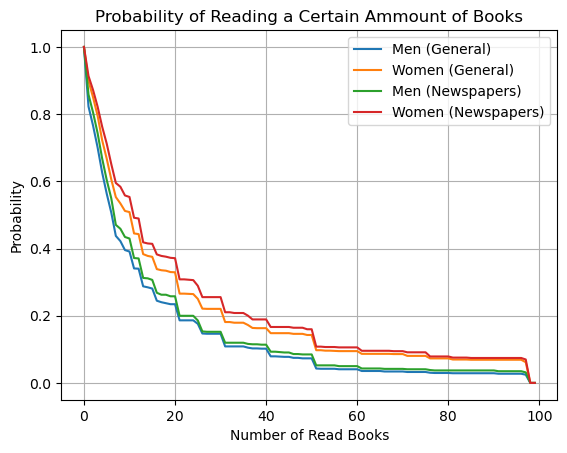

In [32]:
## Calculating some Probabilities
### a) Prob. of a man/women reading more than N books - General Population
N_max = 100
men_list = []
women_list = []

for N in range(N_max):    
    p_N_and_man = df.query('`Books Read` >= @N and `Sex` == "Male"').shape[0]/df.shape[0]
    p_man = df.query('Sex == "Male"').shape[0]/df.shape[0]
    men_list.append(p_N_and_man/p_man)

    p_N_and_woman = df.query('`Books Read` >= @N and `Sex` == "Female"').shape[0]/df.shape[0]
    p_woman = df.query('Sex == "Female"').shape[0]/df.shape[0]
    women_list.append(p_N_and_woman/p_woman)

plt.figure()
plt.plot(range(N_max), men_list)
plt.plot(range(N_max), women_list)

### b) Prob. of a man/women reading more than N books - People who read Newspapers
N_max = 100
men_list = []
women_list = []

for N in range(N_max):    
    p_N_and_man = df1.query('`Books Read` >= @N and `Sex` == "Male"').shape[0]/df1.shape[0]
    p_man = df1.query('Sex == "Male"').shape[0]/df1.shape[0]
    men_list.append(p_N_and_man/p_man)

    p_N_and_woman = df1.query('`Books Read` >= @N and `Sex` == "Female"').shape[0]/df1.shape[0]
    p_woman = df1.query('Sex == "Female"').shape[0]/df1.shape[0]
    women_list.append(p_N_and_woman/p_woman)

plt.plot(range(N_max), men_list)
plt.plot(range(N_max), women_list)
plt.grid()
plt.legend(['Men (General)', 'Women (General)','Men (Newspapers)','Women (Newspapers)'])
plt.xlabel('Number of Read Books')
plt.ylabel('Probability')
plt.title('Probability of Reading a Certain Ammount of Books')

Analisando o gráfico acima, notamos que ler jornais exerce pouca influência no hábito de leitura tanto de homens quanto de mulheres. Nos dois casos, vemos que as pessoas que lêem jornais têm apenas uma probabilidade ligeiramente superior às que não lêem jornais de lerem uma determinada quantidade de livros.

### Quantos livros são necessário para formarmos um leitor voraz?

O que vamos investigar agora é se, após ler uma determinada quantidade de livros, um leitor se torna voraz. Para isso, vamos adotar que um leitor voraz é uma pessoa que leu ao menos 50 livros.

Para isso, vamos considerar a probabilidade de ler ao menos 50 livros, dado que uma pessoa leu, ao menos, "N" livros, ou seja, estamos interessados na probabilidade a posteriori $P[50 \vert N]$, para diferentes valores de "N", como apresentado no gráfico abaixo.

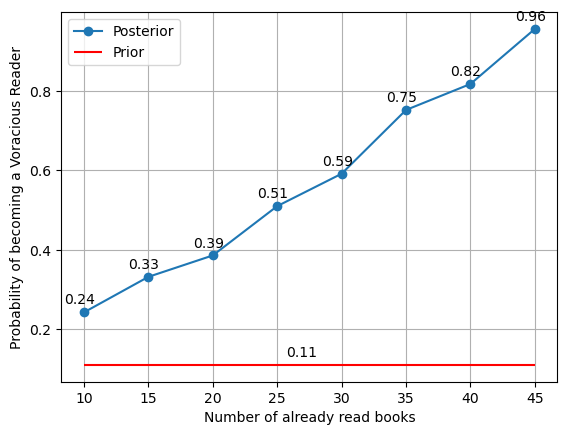

In [33]:
###Baseline: probability of reading at least 50 books considering the general population
N_lim = 50

prob_prior = df[df['Books Read']>=N_lim].shape[0]/df.shape[0]
prob_posterior_50_list = []
N0_list = np.arange(10, 50, 5)

for N0 in N0_list:
    p_N_and_N0 = df.query('`Books Read`>=@N0 and `Books Read`>=@N_lim').shape[0]/df.shape[0]
    p_N0 = df.query('`Books Read`>=@N0').shape[0]/df.shape[0]
    p_posterior = p_N_and_N0/p_N0
    prob_posterior_50_list.append(p_posterior)

plt.figure()
plt.plot(N0_list, prob_posterior_50_list, marker='o')
plt.hlines(y=prob_prior, xmin=N0_list[0], xmax=N0_list[-1], colors='red')
plt.annotate(str(np.round(prob_prior,2)), (26.0, prob_prior), textcoords="offset points", xytext=(8,6), ha='center') 
for x,y in zip(N0_list, prob_posterior_50_list):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(8,6), # distance from text to points (x,y)
                ha='right') # horizontal alignment can be left, right or center

plt.legend(['Posterior','Prior'])
plt.xlabel('Number of already read books')
plt.ylabel('Probability of becoming a Voracious Reader')
plt.grid()

Com base no resultado anterior, notamos que das pessoas que leram ao menos 25 livros, em torno de 50% delas se tornaram leitoras vorazes, ou seja, leram mais de 50 livros em um ano.

Como era esperado, aumentando esse limiar, aumentamos, também, as chances de observarmos um leitor voraz. Dos que leram ao menos 40 livros, 80% se tornaram leitores vorazes, enquanto que essa taxa cai para 20% quando analisamos as pessoas que leram ao menos 20 livros.

Uma outra informação interessante dessa análise, é que mesmo tendo lido uma quantidade relativamente pequena de livros, a pessoa dobra as suas chances de se tornar um leitor voraz, quando comparada com as chances de observamos um leitor voraz na população como um todo. No gráfico acima, podemos observar que dado que uma pessoa já leu 10 livros, ela tem uma chance de 0,24 de se tornar uma leitora voraz, mais do que o dobro da probabilidade a priori, 0,11. Ainda comparando com a probabilidade a priori, as chances de se tornar um leitor voraz triplicam para aqueles que conseguiram ler ao menos 15 livros.

### Como são os diferentes grupos de leitores?

Para finalizar a nossa análise exploratória dos dados, vamos analisar algumas das características de três grupos de leitores:

1) Os que leram ao menos "0" livros em um ano (ou seja, a população toda --- baseline)
2) Os que leram ao menos 20 livros em um ano (grupo de leitores acima da média, mas não vorazes)
3) Os que leram ao menos 50 livros em um ano (grupo de leitores vorazes)

As características que levamos em conta são o percentual de indivíduos que são aposentados (Retired), que lêem com livros impressos (Printed Books), que emprestam livros da biblioteca (Library), que se formaram em uma universidade (College Graduate), que são homens (Male), que lêem revistas (Magazines) ou jornais (Newspapers), e também a média de idade de cada um dos três grupos analisados.

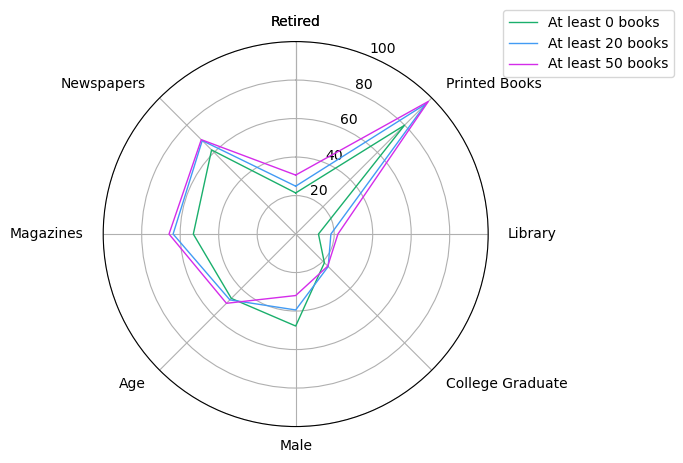

In [34]:
###Radar Plot
labels = ['Retired', 'Printed Books', 'Library', 'College Graduate', 'Male', 'Age', 'Magazines', 'Newspapers']
num_vars = len(labels)
labels += labels[:1]


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

##Adding data
N_list = [0, 20, 50]
color_list = ['#1aaf6c', '#429bf4', '#d42cea']
for N, color in zip(N_list,color_list):
    df_aux = df[df['Books Read']>=N]
    employed = 100*df_aux[df_aux['Employement']=='Retired'].shape[0]/df_aux.shape[0]
    printed = 100*df_aux[df_aux['Printed Books']=='Yes'].shape[0]/df_aux.shape[0]
    college = 100*df_aux[df_aux['Education']=='College graduate'].shape[0]/df_aux.shape[0]
    library = 100*df_aux[df_aux['Book Origin']=='Borrowed the book from a library'].shape[0]/df_aux.shape[0]
    male = 100*df_aux[df_aux['Sex']=='Male'].shape[0]/df_aux.shape[0]
    age = df_aux['Age'].mean()
    magazine = 100*df_aux[df_aux['Journals']=='Yes'].shape[0]/df_aux.shape[0]
    newspapers = 100*df_aux[df_aux['Newspapers']=='Yes'].shape[0]/df_aux.shape[0]
    values = [employed, printed, library, college, male, age, magazine, newspapers]
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label='At least '+str(N)+' books')
    #ax.fill(angles, values, color=color, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
ax.set_rlabel_position(180 / num_vars)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))

De um modo geral, notamos que os indivíduos dos grupos 2) e 3) se assemelham bastante na maior parte das variáveis consideradas. Notamos, contudo, que o grupo de leitores vorazes tem um percentual de mulheres maior do que o grupo 2). Além disso, o grupo 3) também tem um percentual maior de pessoas aposentadas do que os demais grupos. 

Quando comparamos os grupos 2) e 3) com a população geral (grupo 1), notamos que nesses dois grupos, as pessoas lêem mais jornais e revistas do que a população geral, e também têm mais acesso a livros impressos. Esse resultado pode ser uma consequência de que as pessoas dos grupos 2) e 3) frequentem mais livrarias e bancas, o que facilitaria o consumo tanto de jornais e revistas, quanto de livros.

Outro dado interessante, é que esses dois grupos emprestam mais livros da biblioteca do que a população em geral. Com base nesse resultado, pode ser interessante que as autoridades competentes fomentem atividades em bibliotecas municipais, a fim de aumentar o hábito de leitura.

Quanto a formação universitária e a média de idade, os três grupos se assemelham bastante, o que pode indicar que essas características exercem uma influência menor no hábito de leitura.